In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
results1 = pd.read_csv('./logs/MLP_experiments.csv')
results2 = pd.read_csv('./logs/CNN_experiments0.5.csv')
results3 = pd.read_csv('./logs/CNN_experiments1.csv')
results4 = pd.read_csv('./logs/CNN_experiments1.5.csv')
results5 = pd.read_csv('./logs/CNN_experiments2.csv')
results6 = pd.read_csv('./logs/GraphConv_experiments.csv')
results7 = pd.read_csv('./logs/GIN_experiments.csv')

In [19]:
results = pd.concat([results1,results2,results3,results4,results5,results6,results7])
# Clean dataframe
results = results.apply(lambda x: x.apply(lambda y: y.split(' ')[1][:-1]))
results

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,number_test_samples,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params,train_time,best_epoch
0,'wav','MLP',32,0.5,16,0.005,0.0,0.0,'relu',1,...,4699,2.8651637700193104,0.6607788891253458,0.6007125018252852,0.632375804584892,0.6607788891253459,0.9381311058549802,5080,198.0771677494049,413
1,'wav','MLP',32,0.5,16,0.005,0.25,0.0,'relu',1,...,4699,2.9101687502064433,0.6408876888699724,0.6082729531294633,0.6644685365918824,0.6408876888699723,0.9303050192340341,5080,84.6742832660675,160
2,'wav','MLP',32,0.5,16,0.005,0.5,0.0,'relu',1,...,4699,3.0067263185331026,0.6749441370504362,0.639937319990606,0.676486825459856,0.6749441370504363,0.9571488166442367,5080,102.47405171394348,198
3,'wav','MLP',32,0.5,16,0.005,0.0,0.01,'relu',1,...,4699,2.841984506185117,0.6835164396680145,0.6338473893444219,0.6655748051077557,0.6835164396680145,0.9434488059763191,5080,225.229642868042,487
4,'wav','MLP',32,0.5,16,0.005,0.25,0.01,'relu',1,...,4699,2.883945169385937,0.6688723664609492,0.6255555536677241,0.6627863447732932,0.668872366460949,0.9314804634676837,5080,78.11803817749023,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,'raw','GIN',128,2.0,16,0.0005,0.25,0.16,'relu',8,...,1092,3.2113291157252624,0.3405448717948718,0.33752536458076143,0.36595328854112674,0.3405448717948718,0.7903947593981602,561440,46.03723740577698,77
2156,'raw','GIN',128,2.0,16,0.0005,0.5,0.16,'relu',8,...,1092,3.2105132040086684,0.32698031135531136,0.33083790562449933,0.3720507661167958,0.32698031135531136,0.8061806458571927,561440,44.111835956573486,74
2157,'raw','GIN',128,2.0,16,0.0005,0.0,0.64,'relu',8,...,1092,3.212876096968249,0.3401442307692308,0.33869476121716313,0.3483475370944249,0.3401442307692307,0.8006281873722083,561440,312.9175019264221,715
2158,'raw','GIN',128,2.0,16,0.0005,0.25,0.64,'relu',8,...,1092,3.216526810066167,0.35001717032967034,0.35109879644096725,0.37005199390889015,0.35001717032967034,0.8012117031618511,561440,35.07494783401489,53


In [20]:
mlp_acc = results[results['model'] == '\'MLP\'']['test_acc']
mlp_acc = mlp_acc.astype(float).to_numpy()

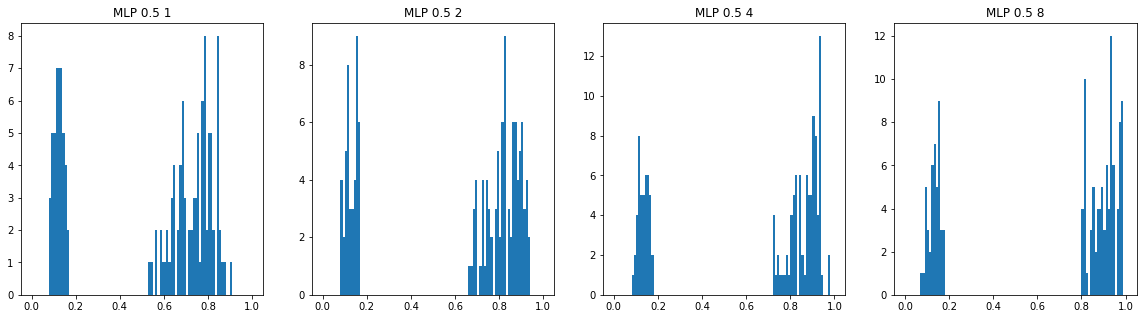

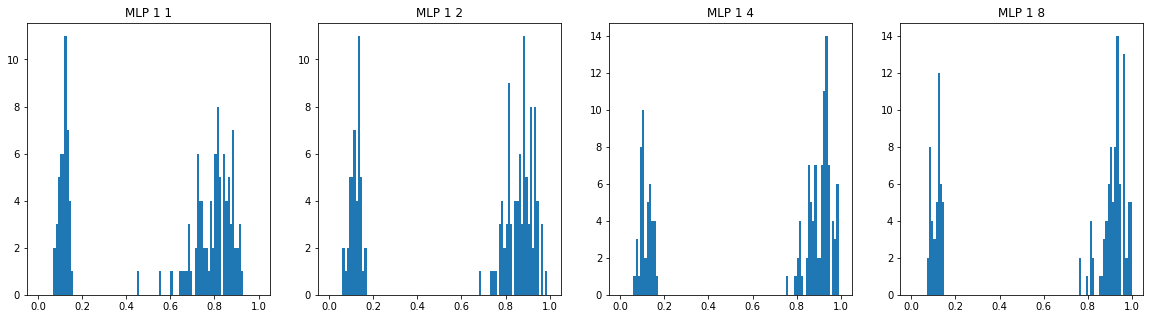

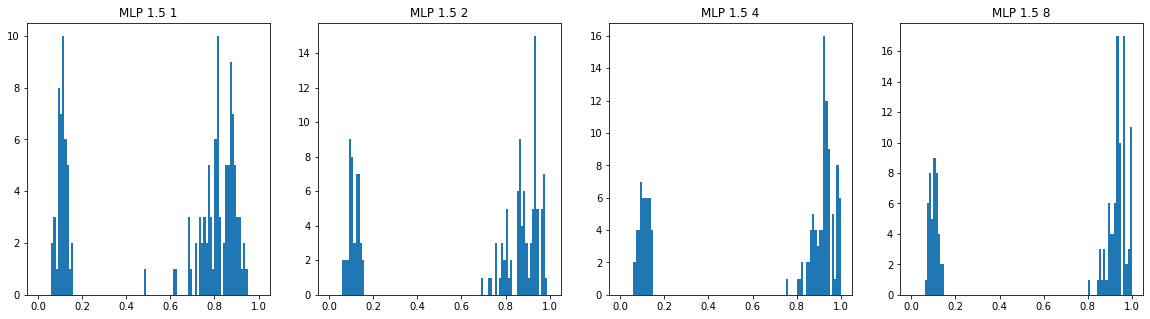

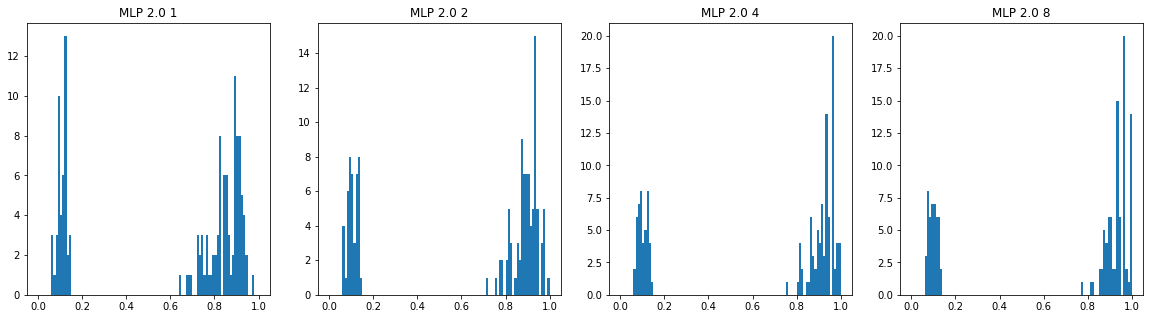

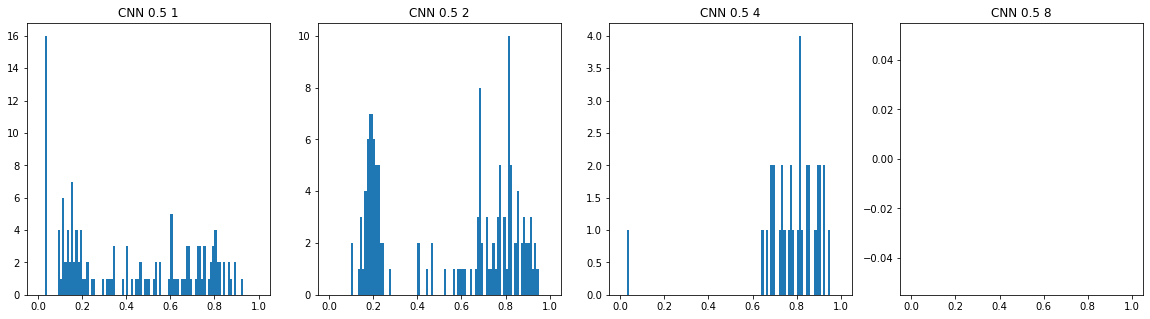

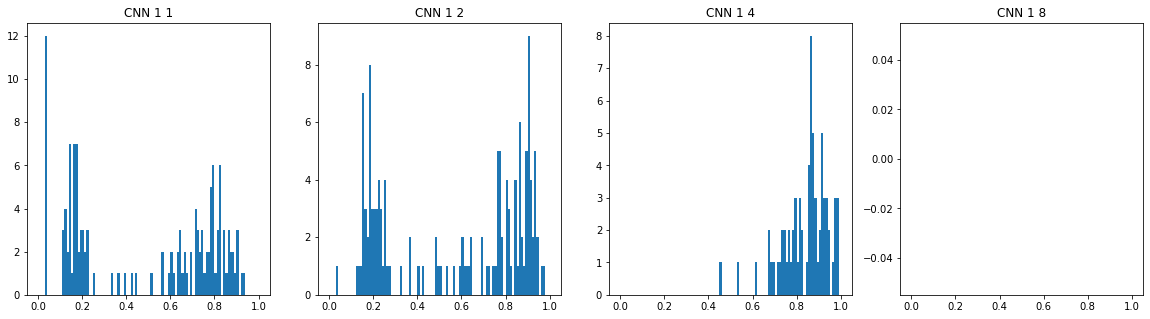

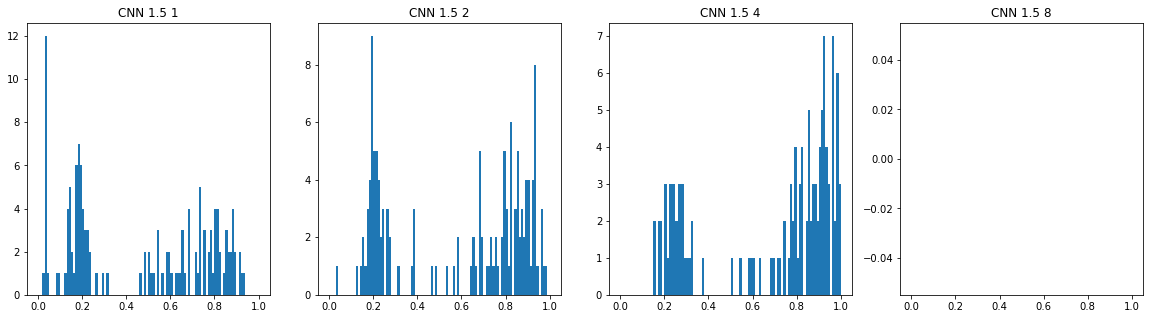

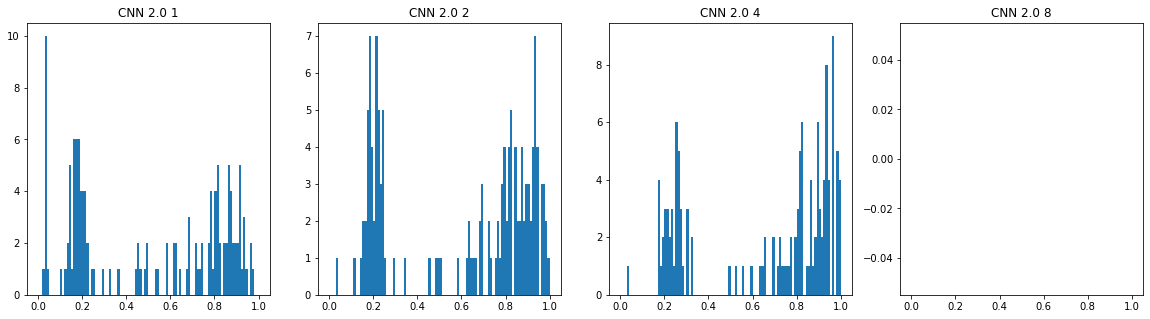

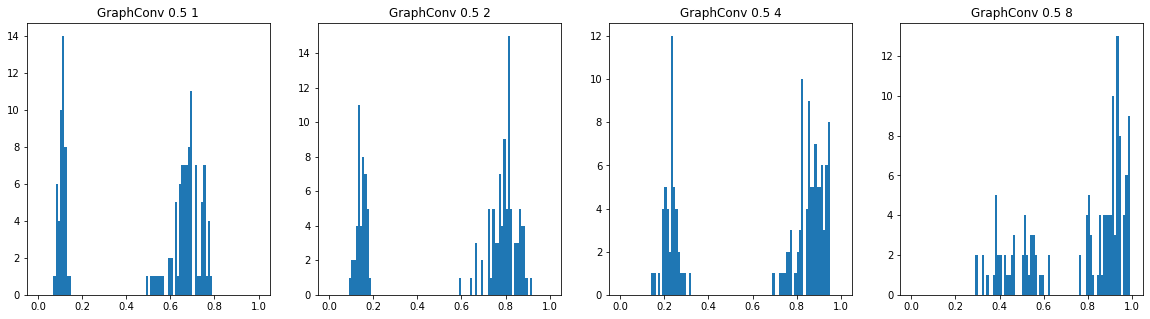

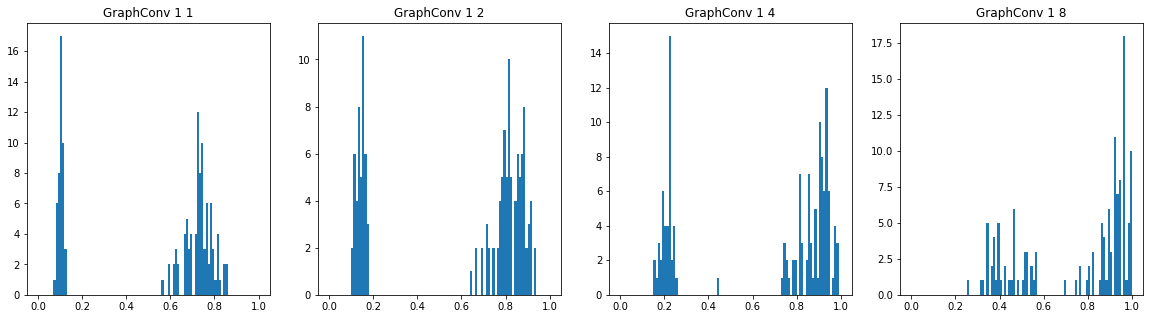

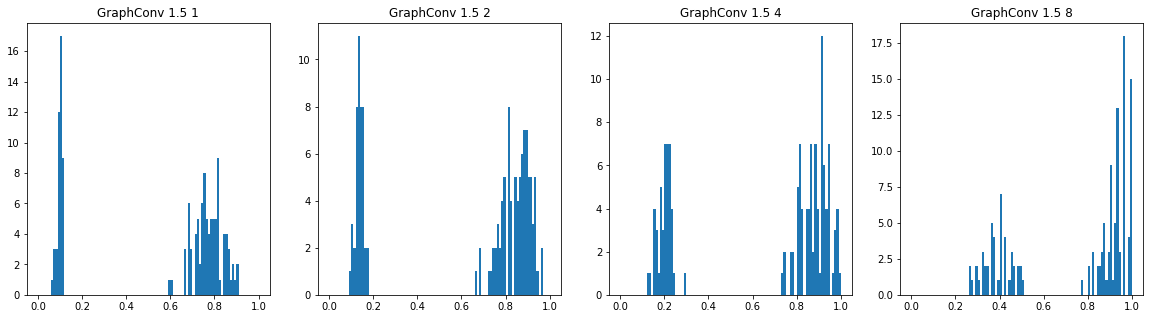

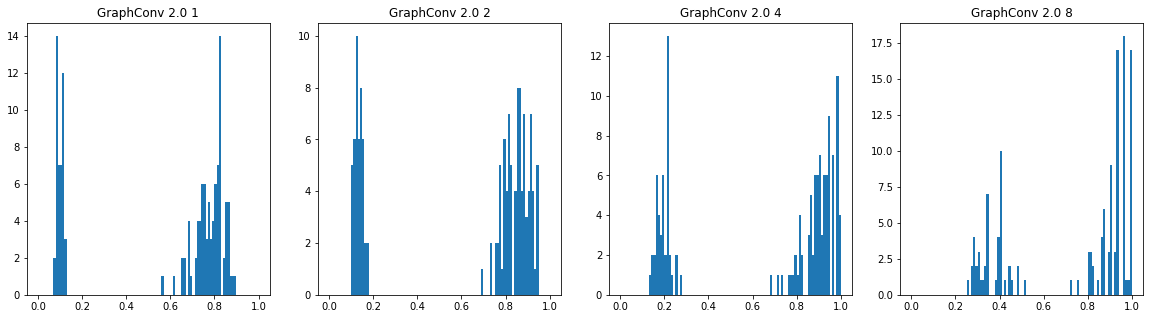

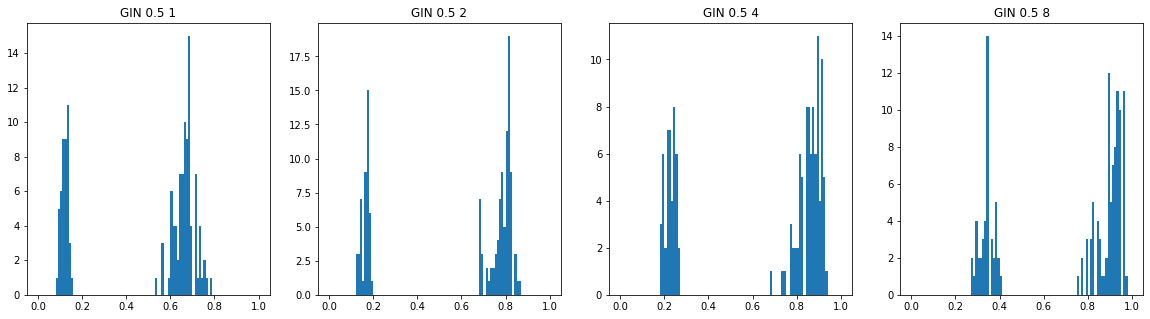

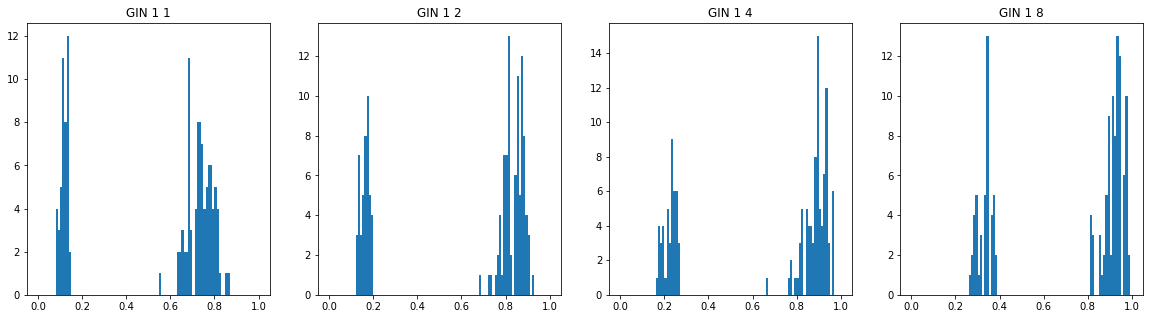

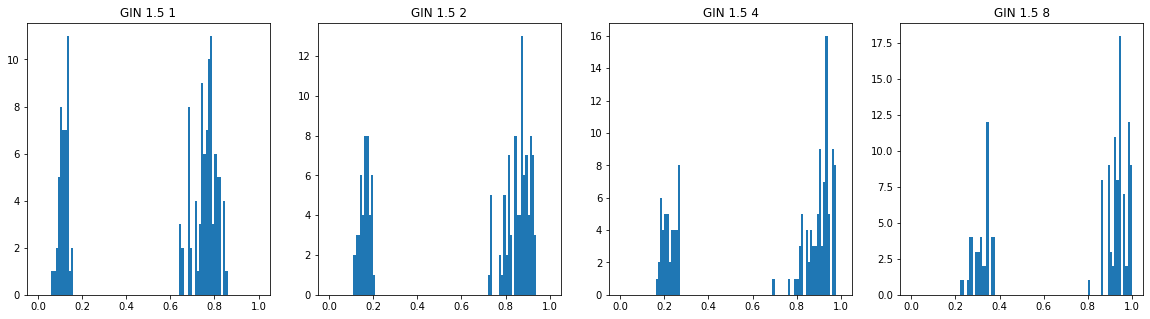

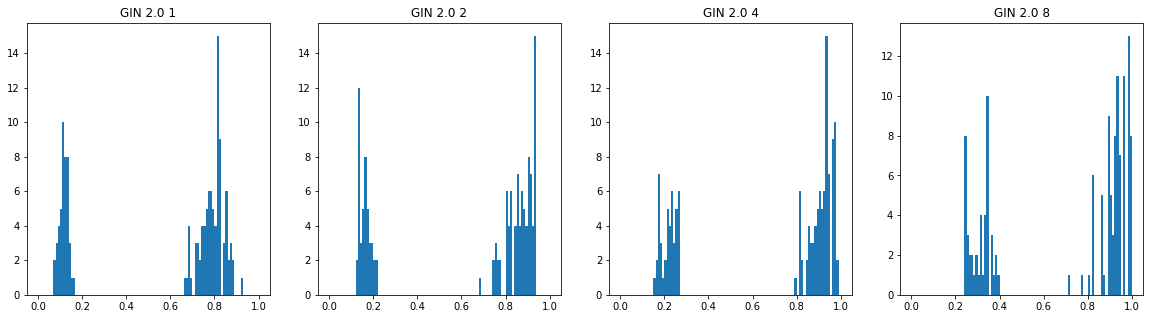

<Figure size 1440x360 with 0 Axes>

In [21]:
plt.figure(figsize=(20,5))
for model, ws in [(model,ws) for model in ['MLP','CNN','GraphConv','GIN'] for ws in [0.5, 1, 1.5, 2.0] ]:
    for i, nts in enumerate([1,2,4,8]):
        plt.subplot(1,4,i+1)
        accs = results[(results['model'] == f'\'{model}\'') & (results['number_train_samples'].astype(int)==nts) & (results['window_size'].astype(float) == ws)]['test_acc']
        accs = accs.astype(float).to_numpy()
        plt.title(f'{model} {ws} {nts}')
        plt.hist(np.round(accs,2),bins=100,range=(0,1),align='mid')
    plt.show()
    plt.figure(figsize=(20,5))

In [ ]:
results = results[(results['window_size'].astype(float) <= 1)]

In [ ]:
results[(results['test_acc'].astype(float) >.95)]['model'].value_counts()

In [ ]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == 0.5 ) & (results['number_train_samples'].astype(float) == 4 ) ]

In [ ]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == 1 ) & (results['number_train_samples'].astype(float) == 2 ) ]

In [ ]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == 1 ) & (results['number_train_samples'].astype(float) == 8 )]